In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r'C:\Users\HP USER\Downloads\heart.csv')
print(data.tail(10))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
293   67    1   2       152   212    0        0      150      0      0.8   
294   44    1   0       120   169    0        1      144      1      2.8   
295   63    1   0       140   187    0        0      144      1      4.0   
296   63    0   0       124   197    0        1      136      1      0.0   
297   59    1   0       164   176    1        0       90      0      1.0   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
293      1   0     3       0  
294      0   0     1       0  
295      2   2     3       0  
296      1   0     2       0  
297     

In [5]:
#Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Step 2: Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


In [7]:
# Remove duplicates if any
data = data.drop_duplicates()

In [8]:
# Step 4: Ensure correct data types
print("Data types before conversion:\n", data.dtypes)
data['age'] = data['age'].astype(int)
data['sex'] = data['sex'].astype(int)
data['cp'] = data['cp'].astype(int)
data['trestbps'] = data['trestbps'].astype(int)
data['chol'] = data['chol'].astype(int)
data['fbs'] = data['fbs'].astype(int)
data['restecg'] = data['restecg'].astype(int)
data['thalach'] = data['thalach'].astype(int)
data['exang'] = data['exang'].astype(int)
data['oldpeak'] = data['oldpeak'].astype(float)
data['slope'] = data['slope'].astype(int)
data['ca'] = data['ca'].astype(int)
data['thal'] = data['thal'].astype(int)
data['target'] = data['target'].astype(int)
print("Data types after conversion:\n", data.dtypes)

Data types before conversion:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Data types after conversion:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [9]:
# Identify and handle outliers 
# use z-score to identify outliers
from scipy.stats import zscore
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=1)
outliers = outliers[outliers > 0]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 15


In [19]:
# Remove outliers from the dataset
data_no_outliers = data[(z_scores < 3).all(axis=1)]
print(f"Number of rows after removing outliers: {len(data_no_outliers)}")


Number of rows after removing outliers: 287


In [18]:
# Check for outliers again
z_scores_no_outliers = np.abs(zscore(data_no_outliers.select_dtypes(include=[np.number])))
outliers_no_outliers = (z_scores_no_outliers > 3).sum(axis=1)
outliers_no_outliers = outliers_no_outliers[outliers_no_outliers > 0]
print(f"Number of outliers after removing: {len(outliers_no_outliers)}")

Number of outliers after removing: 2


In [17]:
# Apply another transformation, for example, Box-Cox if the data is positive
from scipy.stats import boxcox

data_transformed = data_no_outliers.copy()
for column in data.select_dtypes(include=[np.number]).columns:
    if data_transformed[column].min() > 0:  # Box-Cox requires positive values
        data_transformed[column], _ = boxcox(data_transformed[column])

# Check for outliers again
z_scores_transformed = np.abs(zscore(data_transformed.select_dtypes(include=[np.number])))
outliers_transformed = (z_scores_transformed > 3.5).sum(axis=1)
outliers_transformed = outliers_transformed[outliers_transformed > 0]
print(f"Number of outliers after Box-Cox transformation: {len(outliers_transformed)}")




Number of outliers after Box-Cox transformation: 0


In [20]:
 #Normalize/Clean Data
# Ensuring 'sex' column has only 0 and 1
data = data[data['sex'].isin([0, 1])]

In [22]:
# Ensuring 'fbs' column has only 0 and 1
data = data[data['fbs'].isin([0, 1])]

# Ensuring 'exang' column has only 0 and 1
data = data[data['exang'].isin([0, 1])]

# Ensure categorical columns have appropriate values
# 'cp' should be in [0, 1, 2, 3]
data = data[data['cp'].isin([0, 1, 2, 3])]

# 'restecg' should be in [0, 1, 2]
data = data[data['restecg'].isin([0, 1, 2])]

# 'slope' should be in [0, 1, 2]
data = data[data['slope'].isin([0, 1, 2])]

# 'thal' should be in [0, 1, 2, 3]
data = data[data['thal'].isin([0, 1, 2, 3])]

In [23]:
# Check for negative or zero values in columns where they don't make sense
columns_to_check = ['age', 'trestbps', 'chol', 'thalach']

for column in columns_to_check:
    wrong_data = data_no_outliers[data_no_outliers[column] <= 0]
    if not wrong_data.empty:
        print(f"Wrong data in column '{column}':")
        print(wrong_data)


In [24]:
#Checking for Unreasonable Range
#  Define reasonable ranges
reasonable_ranges = {
    'age': (1, 120),
    'trestbps': (90, 200),  # Typical range for resting blood pressure
    'chol': (100, 600),     # Typical range for cholesterol
    'thalach': (60, 220)    # Typical range for maximum heart rate
}

for column, (min_val, max_val) in reasonable_ranges.items():
    wrong_data = data_no_outliers[(data_no_outliers[column] < min_val) | (data_no_outliers[column] > max_val)]
    if not wrong_data.empty:
        print(f"Wrong data in column '{column}':")
        print(wrong_data)


In [25]:
#check for inconsistencies
inconsistent_data = data_no_outliers[(data_no_outliers['age'] > 90) & (data_no_outliers['thalach'] < 80)]
if not inconsistent_data.empty:
    print("Inconsistent data found:")
    print(inconsistent_data)


In [26]:
#Save the cleaned dataset to a CSV file
data_no_outliers.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'


In [27]:
#Exploratory Data Analysis
# Calculate mean, median, and mode for numerical columns
mean_values = data.mean()
median_values = data.median()
mode_values = data.mode().iloc[0]  # mode() returns a DataFrame, take the first row

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)


Mean values:
 age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

Median values:
 age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Mode values:
 age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        197.0
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 0, dtype: float64


In [33]:
# Summary statistics
data.describe()

# Data types and null values
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


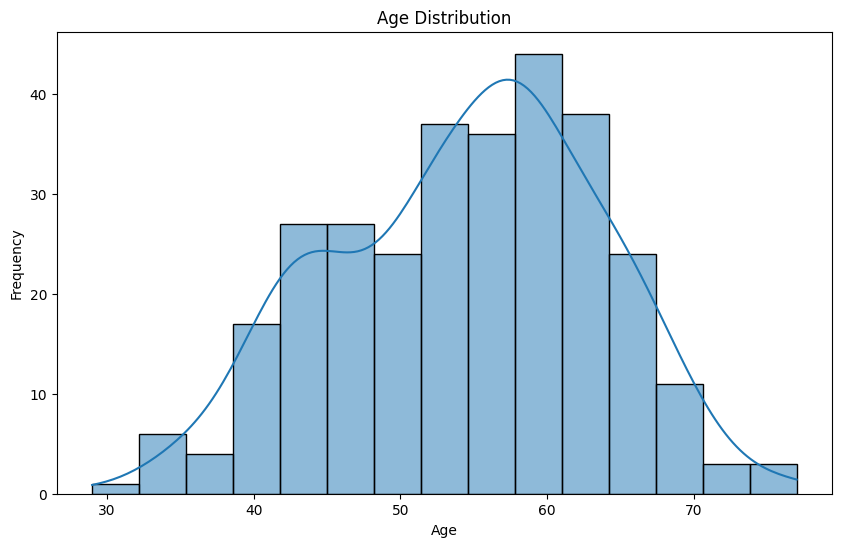

In [29]:
#Visualizations
# Histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




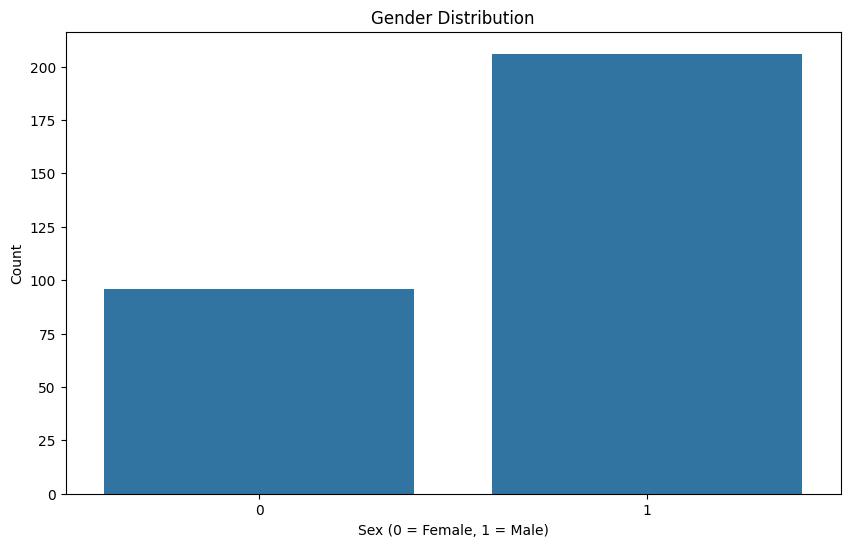

In [31]:
# Bar plot for gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


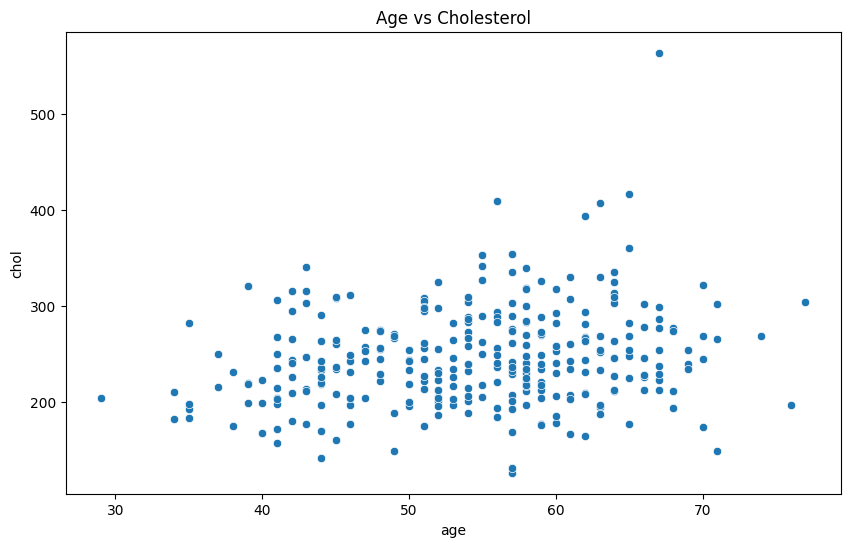

In [34]:
# Relationship between age and cholesterol (chol)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol')
plt.title('Age vs Cholesterol')
plt.show()


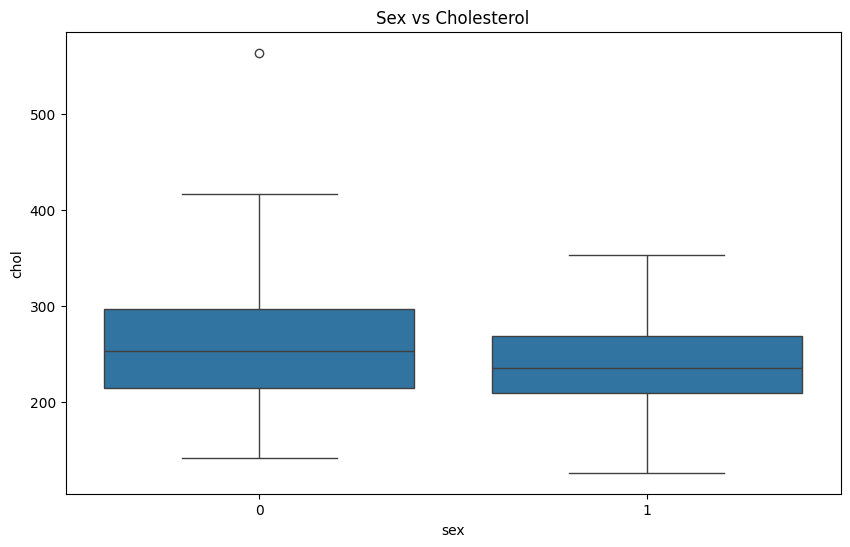

In [38]:
# Relationship between sex and cholesterol (chol)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='sex', y='chol')
plt.title('Sex vs Cholesterol')
plt.show()

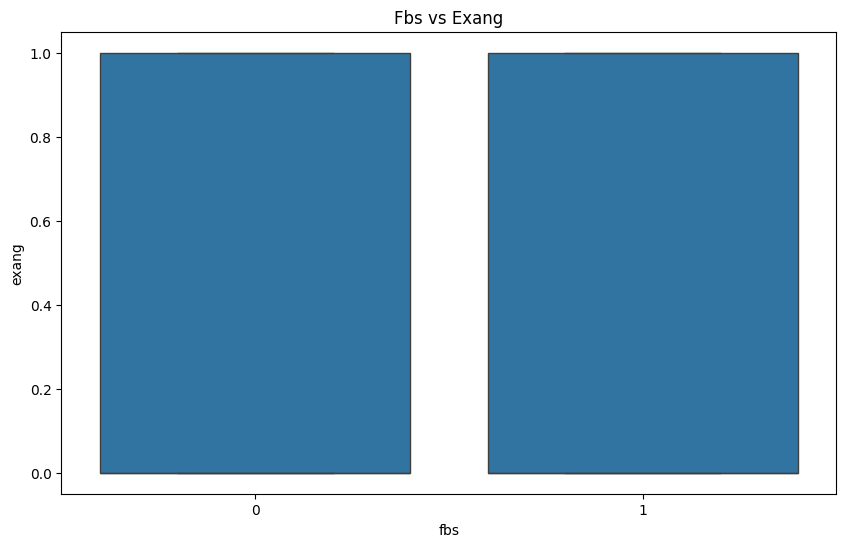

In [42]:
# Relationship between thalach and exang
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fbs', y='exang')
plt.title('Fbs vs Exang')
plt.show()

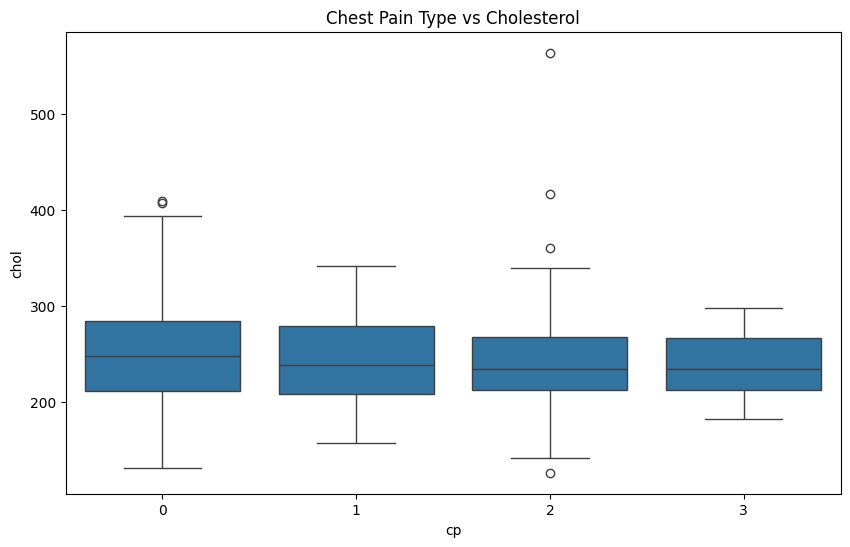

In [43]:
# Relationship between cp and cholesterol (chol)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='cp', y='chol')
plt.title('Chest Pain Type vs Cholesterol')
plt.show()

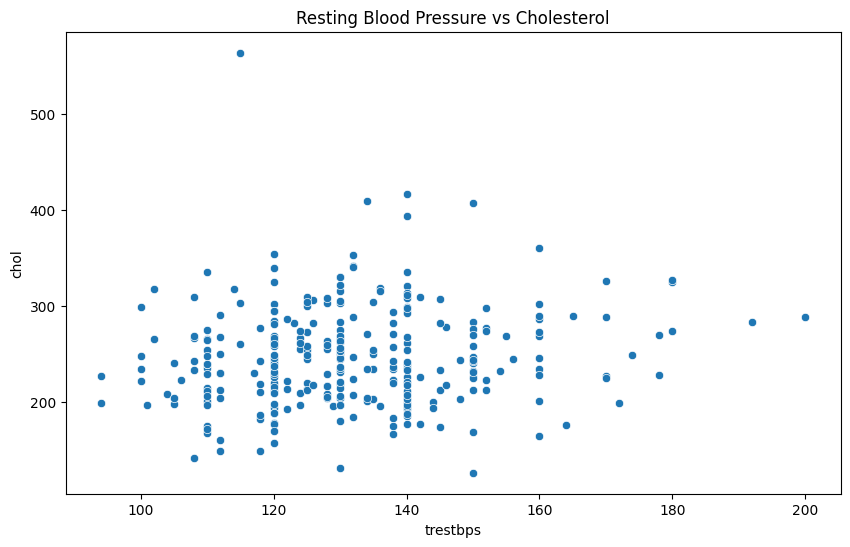

In [44]:
# Relationship between resting blood pressure and cholesterol (chol)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='trestbps', y='chol')
plt.title('Resting Blood Pressure vs Cholesterol')
plt.show()

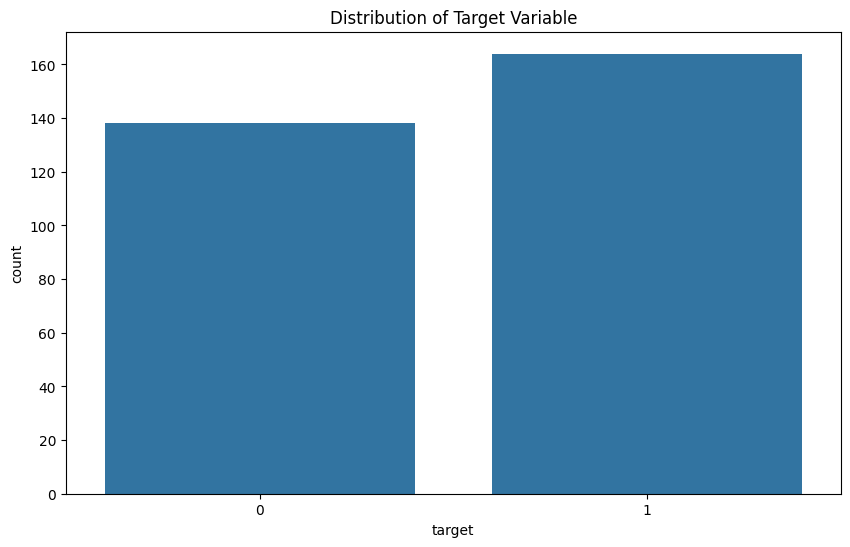

In [45]:
# Relationship between target and other features
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='target')
plt.title('Distribution of Target Variable')
plt.show()